# CASE STUDY : crime in Usa

AIM :Perform Clustering for the crime data and identify the number of clusters formed and draw inferences.

Data Description:

- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States

Clustering
----
Cluster analysis refers to the grouping of observations so that the objects within eachcluster share similar properties, and properties of all clusters are independent of each
other.

type:

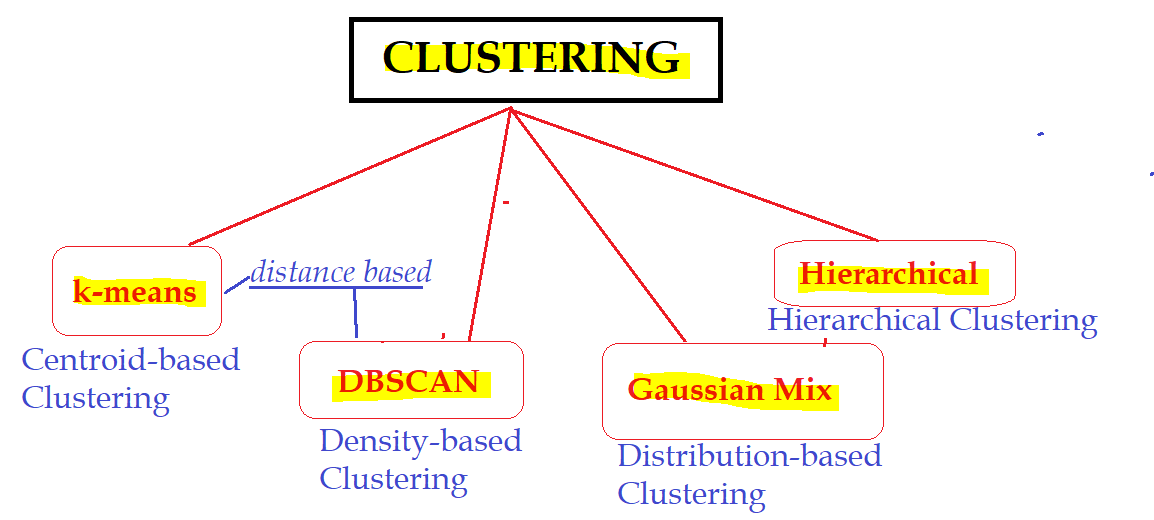

In [2]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#SET 2 : ML CLUSTERING SPECIFIC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

#SET 4 : CLUSTERING EVALUATION SPECIFIC
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [3]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving crime_data.csv to crime_data.csv


In [34]:
# Importing dataset
data = pd.read_csv('crime_data.csv')
print(data.shape)
data.head()

(50, 5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [35]:
#Renaming the Unnamed Column into States
data.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA
----

DataSet analysis
----

- data size
- data type
- data shape

In [36]:
data.shape

(50, 5)

conclusion

- no of observations = 50
- no of features = 5

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


DATA CLEANING
----

- missing/null values
- duplicates


In [38]:
# null/missing
null_count_col = data.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:", null_count_col)

Null Count for Columns: 0    5
dtype: int64


In [39]:
# null count for obeservations/rows
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:", null_count_row)

Null Count for Rows: 0    50
dtype: int64


conclusion : no null feature  neither null oberservation is recorded

In [40]:
#DUPLICATES
data.duplicated().sum()

0

conclusion : 0 duplicate observation

In [44]:
data1=data.iloc[:,1:]
#Droping Strinf feature ie state name
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [45]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


DATASET ANLYSIS (DATA DISTRIBUTION)
--

In [46]:
#features list
data1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

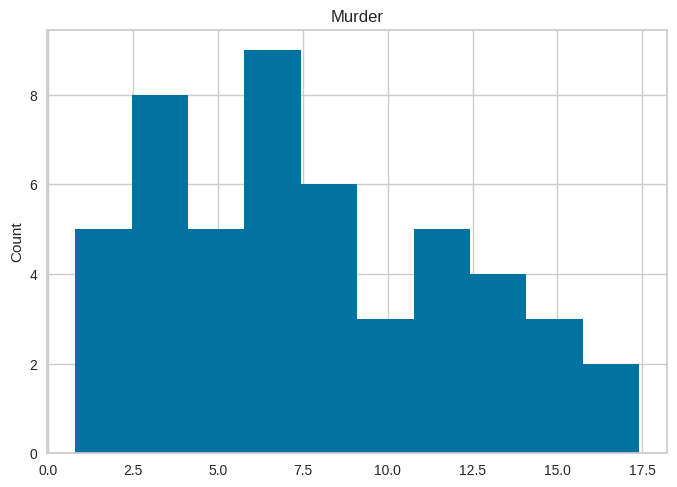

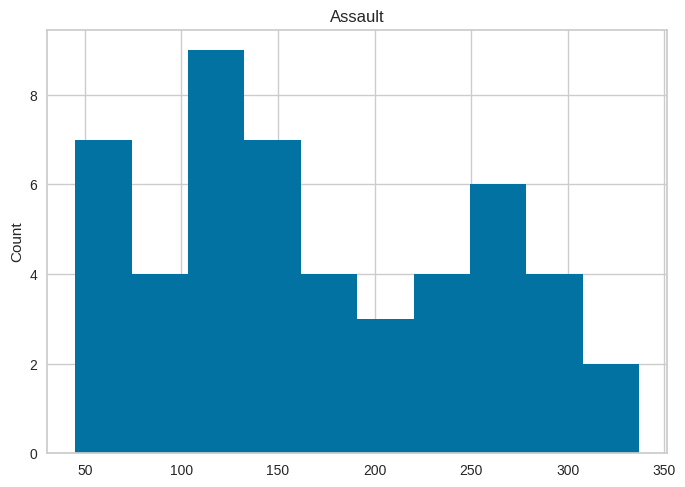

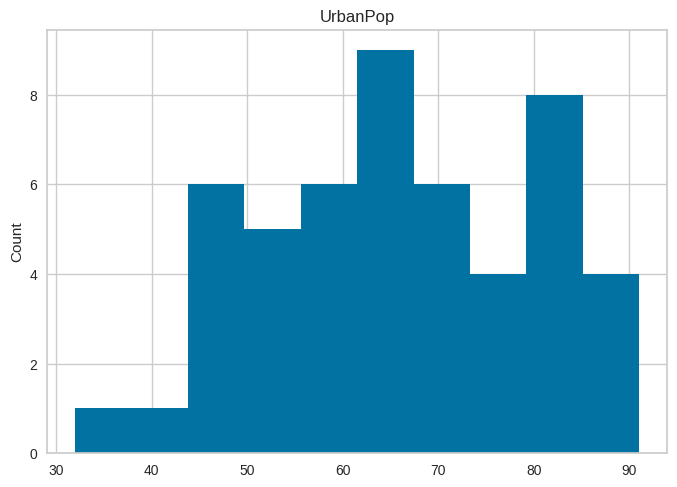

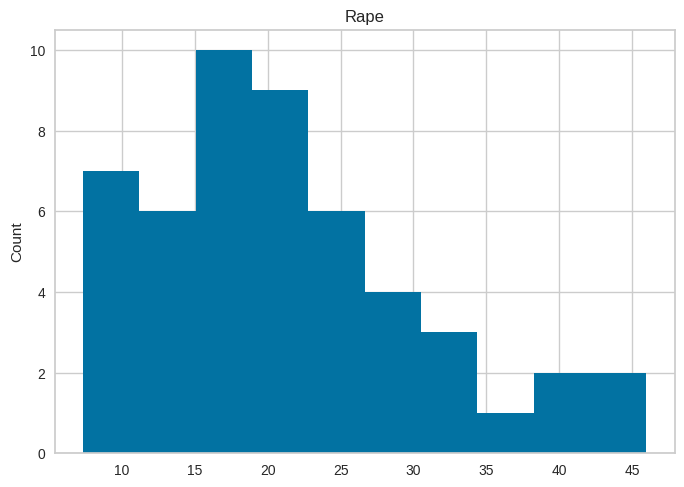

In [47]:
for feature in data1.columns:
    data1=data1.copy()
    if feature !='States':
      data[feature].hist(bins=10)
      plt.ylabel('Count')
      plt.title(feature)
      plt.show()


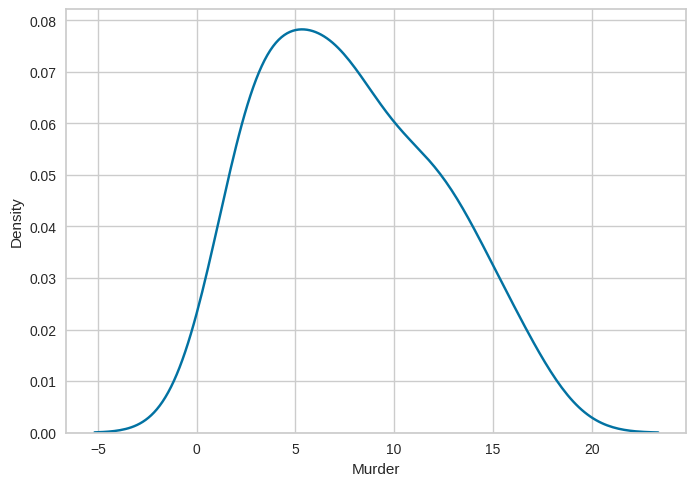

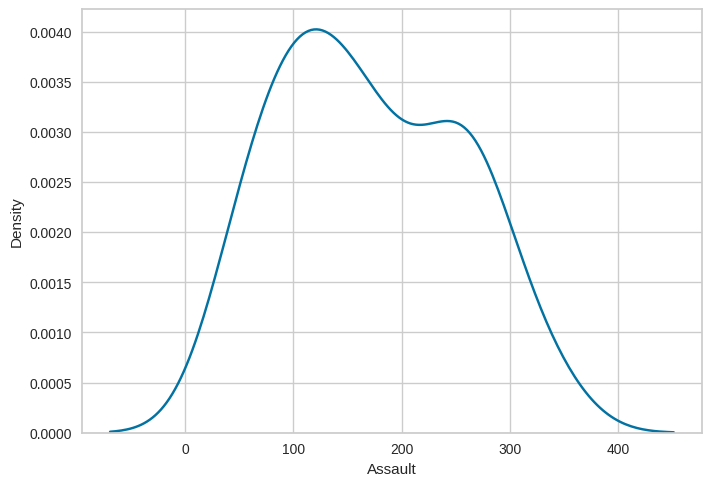

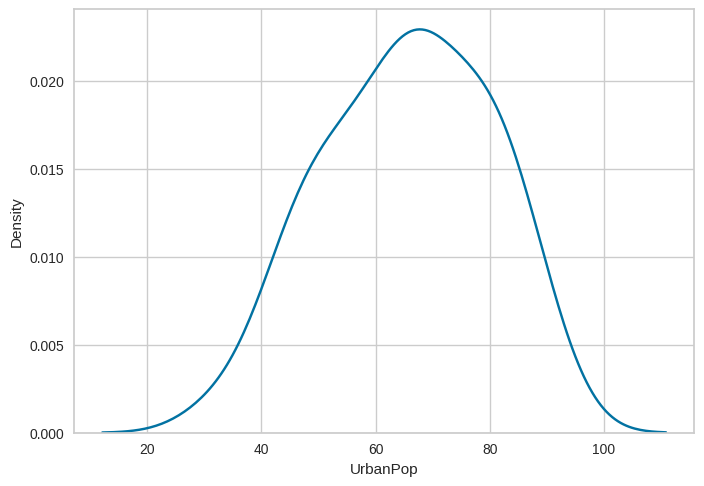

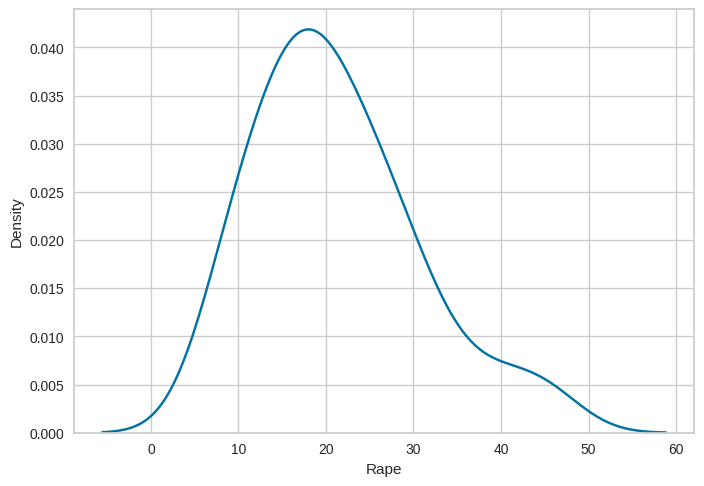

In [48]:
#Ploting curve over to visualise DISTRIBUTION
#KERNEL DENSITY - a smoothly curved surface is fitted over each point.
# Kernel Density for each feature
for j in data1.columns:
    print('\n')
    sns.kdeplot(data1[j])
    plt.show()

CONCLUSION:
 - most of feature are  normal distribusted
 - and go ahead with
 KMEAN , DBSCAN AND HIRERACY

OULIERS ANALYSIS
--

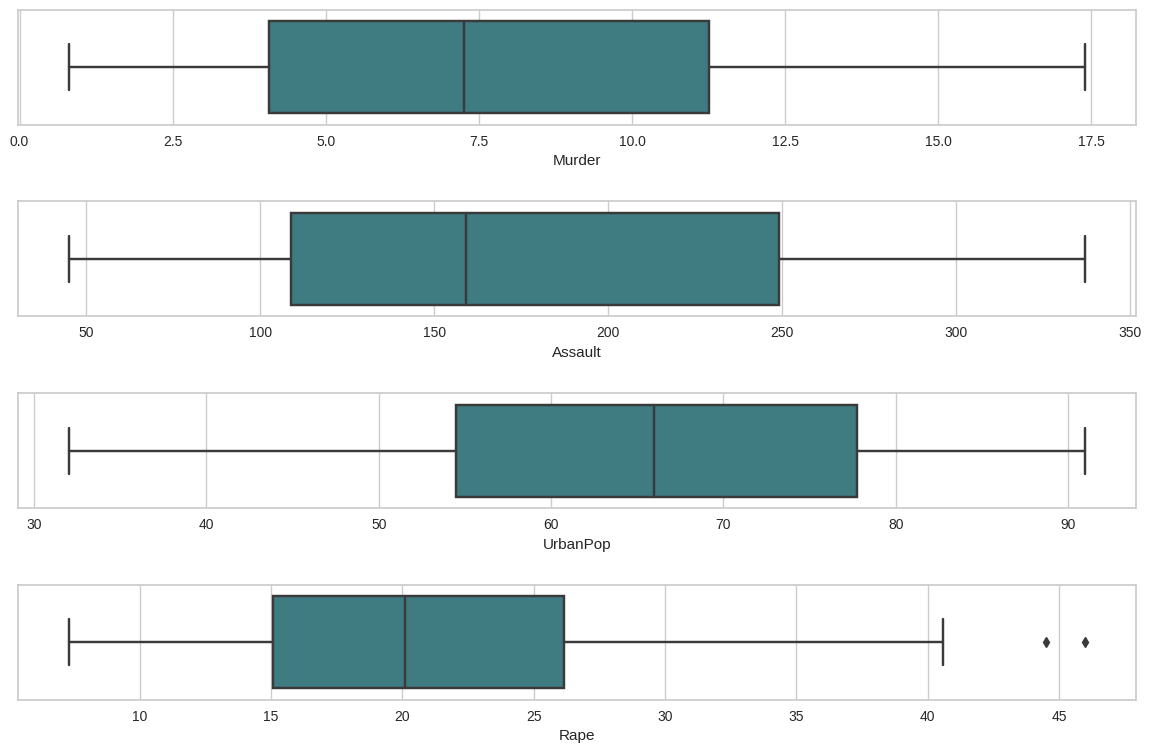

In [49]:
fig, axes=plt.subplots(4,1,figsize=(12,8),sharex=False,sharey=False)
sns.boxplot(x='Murder',data=data1,palette='crest',ax=axes[0])
sns.boxplot(x='Assault',data=data1,palette='crest',ax=axes[1])
sns.boxplot(x='UrbanPop',data=data1,palette='crest',ax=axes[2])
sns.boxplot(x='Rape',data=data1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

<Axes: >

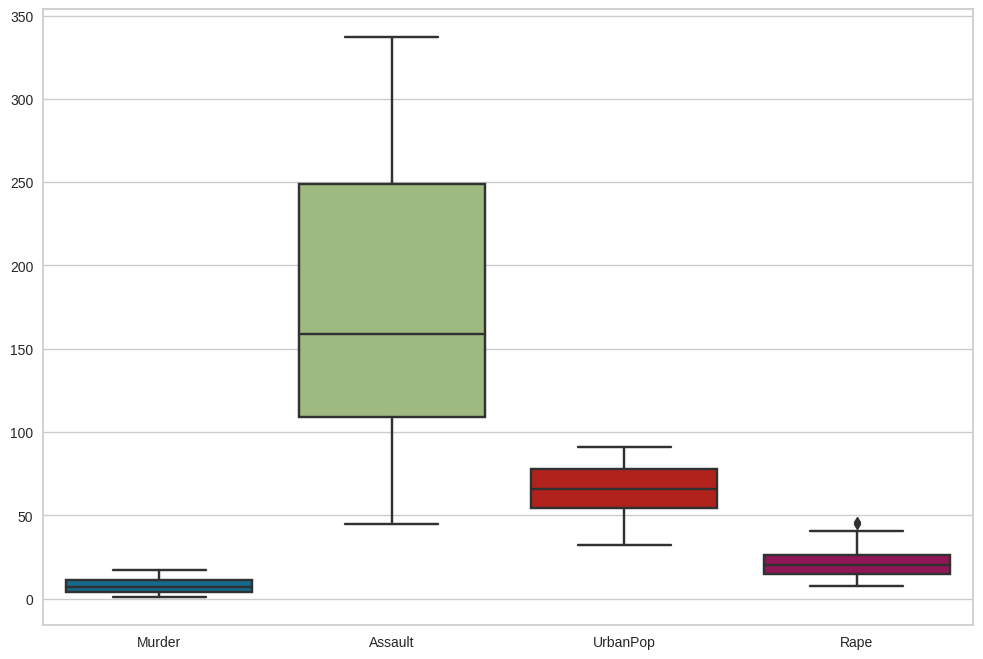

In [50]:
# Box plot for every feature
plt.figure(figsize=(12,8))
sns.boxplot(data=data1)

conclusion : data is nearly free from outliers/anaomalies

Hence continue with Univariate analysis

UNIVARIATE ANALYSIS
---
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

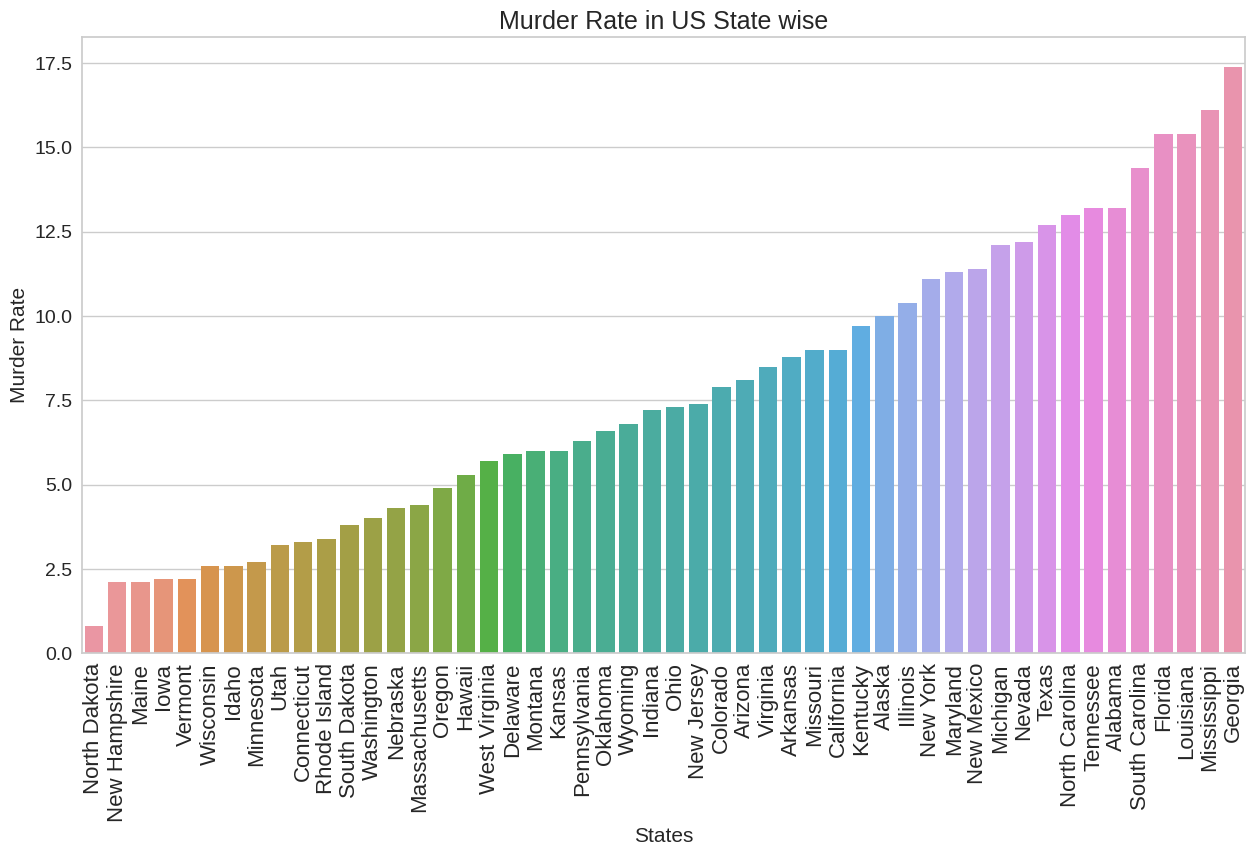

In [53]:
plt.figure(figsize=(15,8))

# make barplot and sort bars
sns.barplot(x='States' ,y ="Murder", data=data, order=data.sort_values('Murder').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Murder Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Murder Rate in US State wise", size=18)
plt.show()



In [55]:
print(' Highest Murder Rate')
data.sort_values('Murder',ascending=False).head()

 Highest Murder Rate


,States,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5


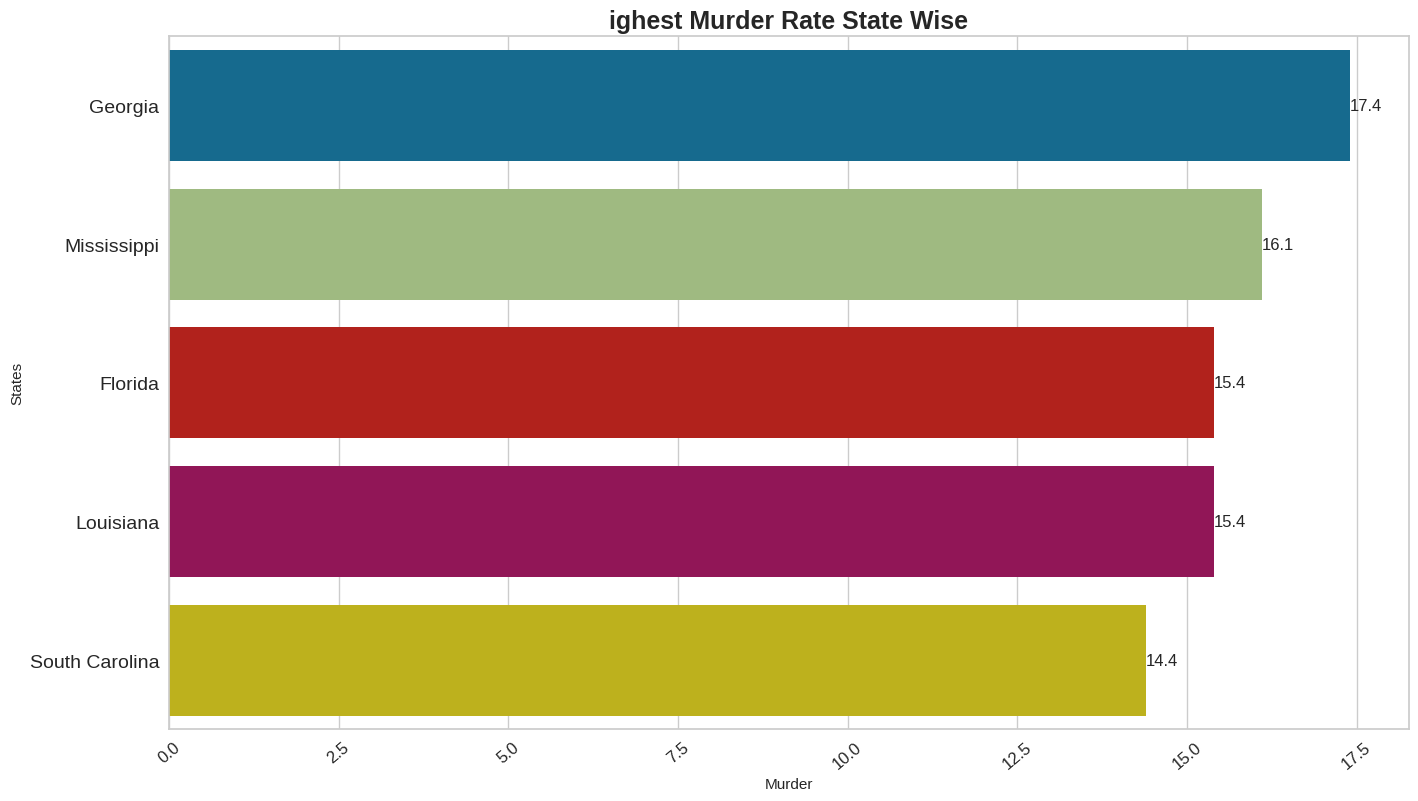

In [57]:
#visualizing
murder = data.sort_values('Murder', ascending = False, ignore_index=True)

#plotiing
plt.figure(figsize = (16,9))
ax = sns.barplot(x = murder.Murder[:5], y = murder.States[:5])
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 40, fontsize = 12)
plt.title('ighest Murder Rate State Wise',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)

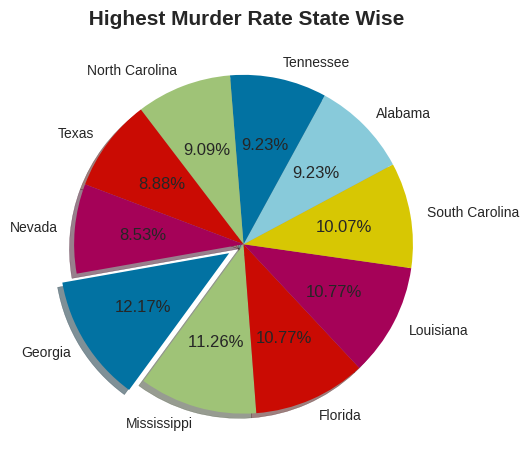

In [60]:
plt.pie(murder.Murder[:10],labels=murder.States[:10],explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',shadow= True,startangle= 190,)

plt.title(" Highest Murder Rate State Wise", fontsize = 15, fontweight = 'bold')
plt.show()

conclusion:

- Highest Murder Rate : Georgia, Missisippi and Florida

ASSAULT RATE

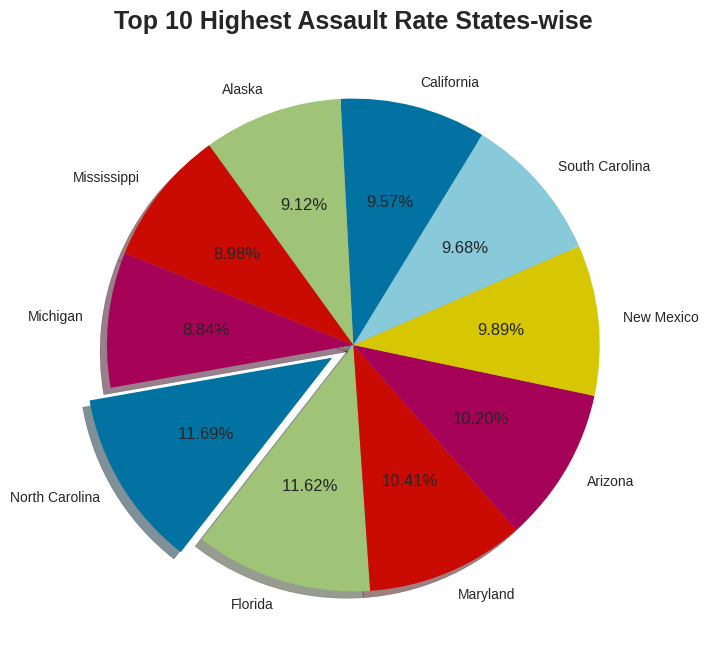

In [62]:
#assault rate analysis
Assault = data.sort_values('Assault', ascending = False)


plt.figure(figsize = (8,8))
plt.pie(Assault.Assault[:10],labels=Assault.States[:10],explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],autopct= '%.2f%%',shadow= True,startangle= 190)
plt.title("Top 10 Highest Assault Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

conclusion:

- Highest Assault Rate : North Carolina, Florida and Maryland

Rape Rate Analysis

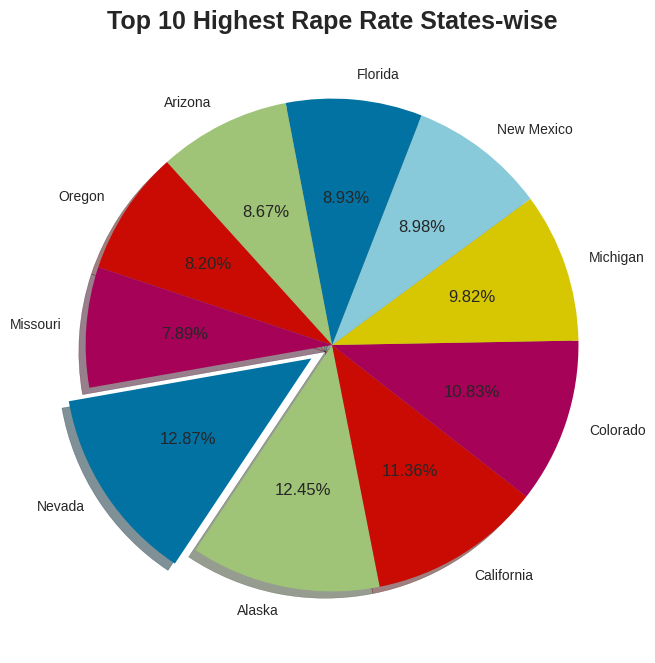

In [66]:
#Rape rate analysis
Rape = data.sort_values('Rape', ascending = False)

plt.figure(figsize = (8,8))
explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.pie(Rape.Rape[:10],labels=Rape.States[:10],explode =explode ,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,)
plt.title("Top 10 Highest Rape Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

conclusion :
Highest Rape Rate : Nevada, Alaska and California

Urban Population Rate

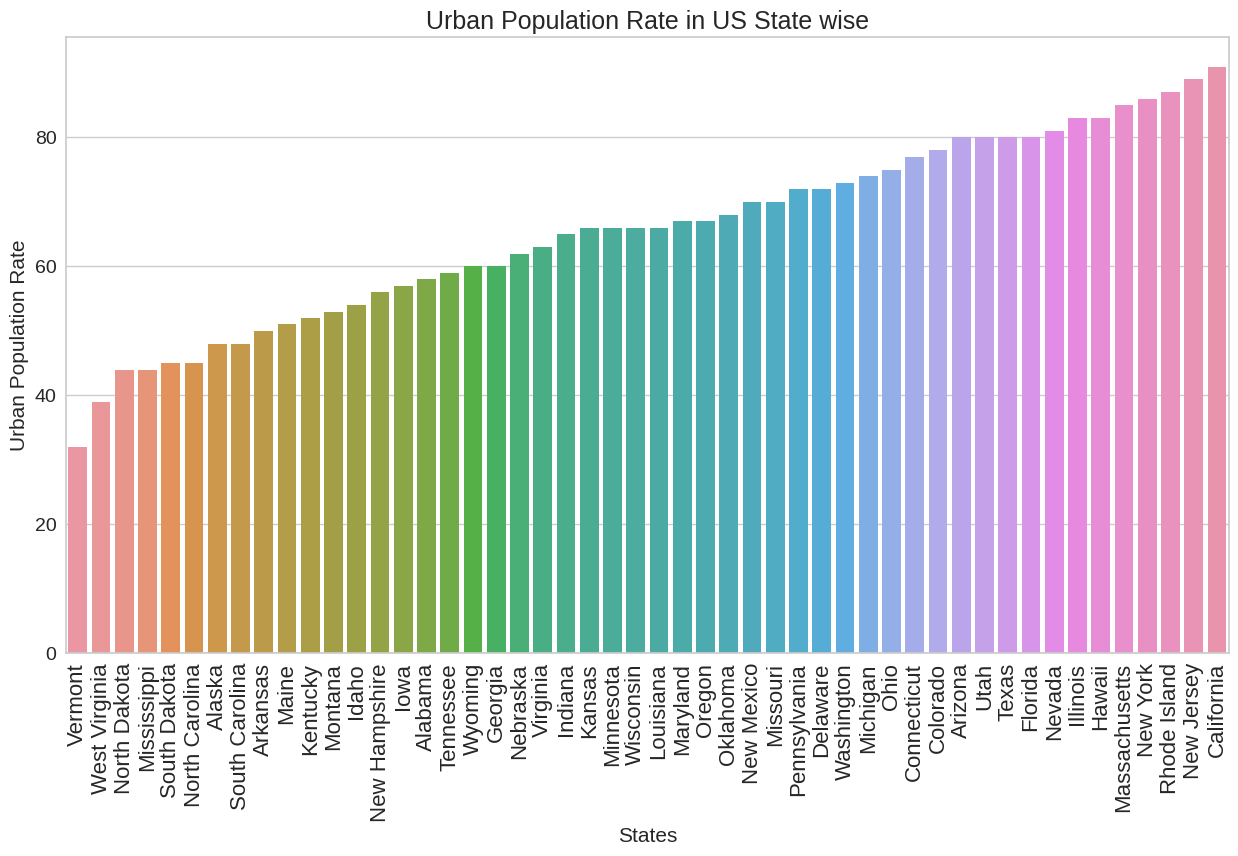

In [54]:
plt.figure(figsize=(15,8))
# make barplot and sort bars
sns.barplot(x='States', y="UrbanPop", data=data,order=data.sort_values('UrbanPop').States)

# set labels
plt.xlabel("States", size=15)
plt.ylabel("Urban Population Rate", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Urban Population Rate in US State wise", size=18)
plt.show()

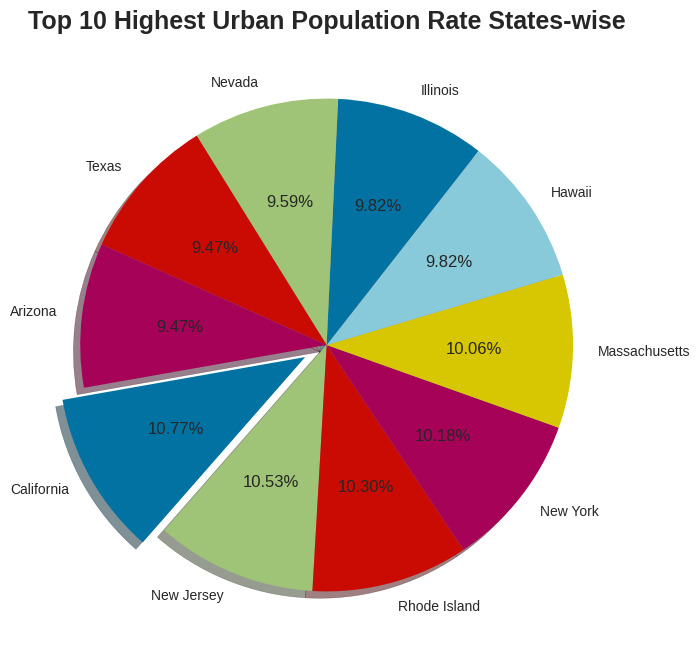

In [67]:
#visulizing
urbanpop = data.sort_values('UrbanPop', ascending = False)

explode = [0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
plt.figure(figsize = (8,8))
plt.pie(urbanpop.UrbanPop[:10],
       labels=urbanpop.States[:10],
       explode = explode,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,)
plt.title("Top 10 Highest Urban Population Rate States-wise", fontsize = 18, fontweight = 'bold')
plt.show()

Conclusion:

- Highest Urban Population Rate : California, New Jersey and Rhode Island

CORRELATION ANLAYSIS
---

In [68]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


<Axes: >

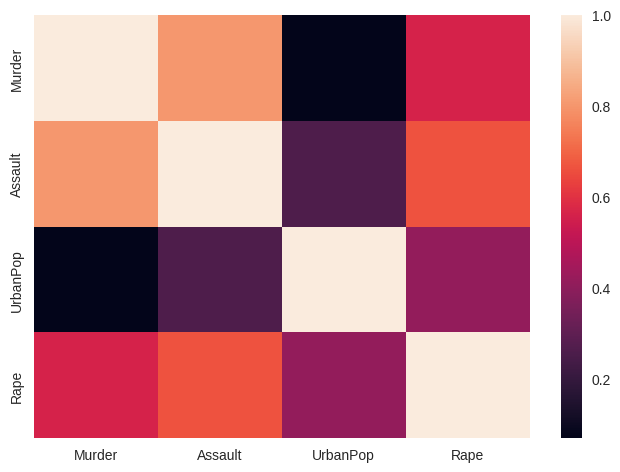

In [70]:
#heatmap
sns.heatmap(data.corr())

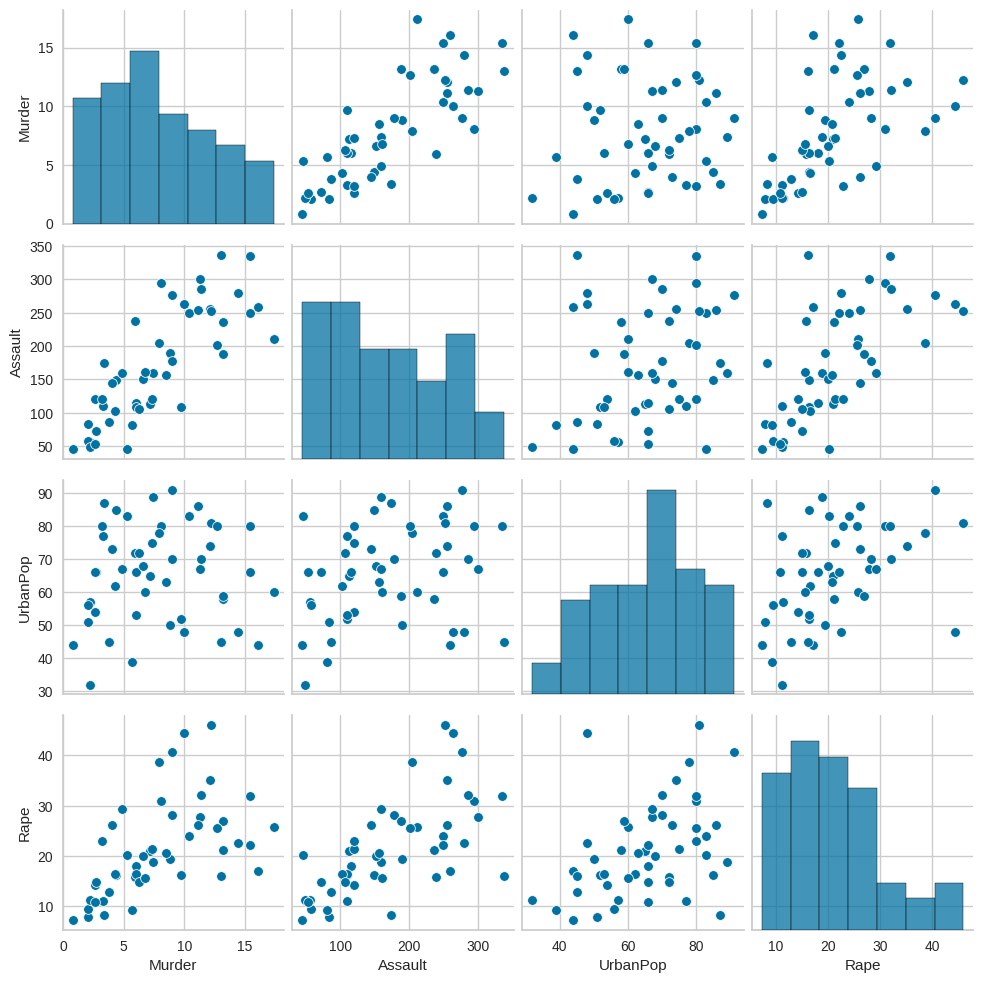

In [71]:
#discover pattern
sns.pairplot(data)

conclusion -

- murder and assault are more correlated

DATA PREPROCESSING
----

- Scaling dataset

 - min max
 - standard scaler

In [72]:
df = data.set_index('States')
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [73]:
#SCALE 1 - STANDARD SCALE
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(50, 4)

In [74]:
#SCALE 2 - Minmax scale
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(50, 4)

CLUSTERING
-----

KMEAN
---

- It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
- It is a centroid-based algorithm, where each cluster is associated with a centroid.
- The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

Method to find optimal k (no of clusters)

- Elbow method
- Variance explained
- BIC score
- Silhouette Score

In [75]:
#STANDARD SCALED DATA IS FIRST FIT TO MODEL
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,51.052241
5,6,44.092128
6,7,41.172381
7,8,34.654861
8,9,31.394760
9,10,26.787782


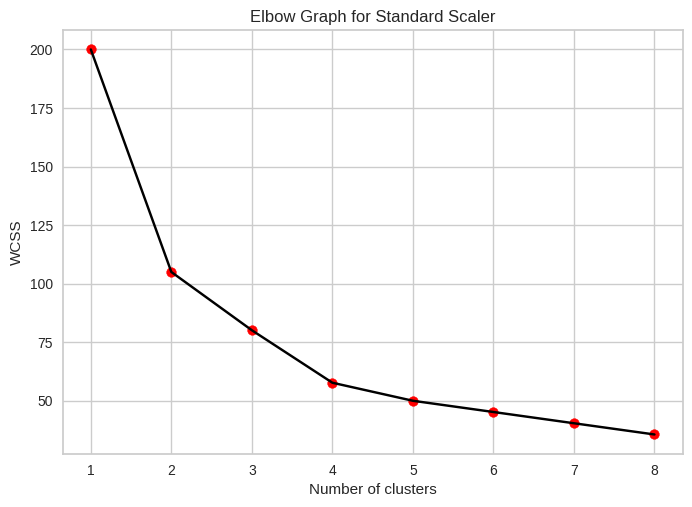

In [76]:
# within-cluster sum-of-squares criterion
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

conlsuion : k=3

In [77]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Elbow for KMeans clustering')

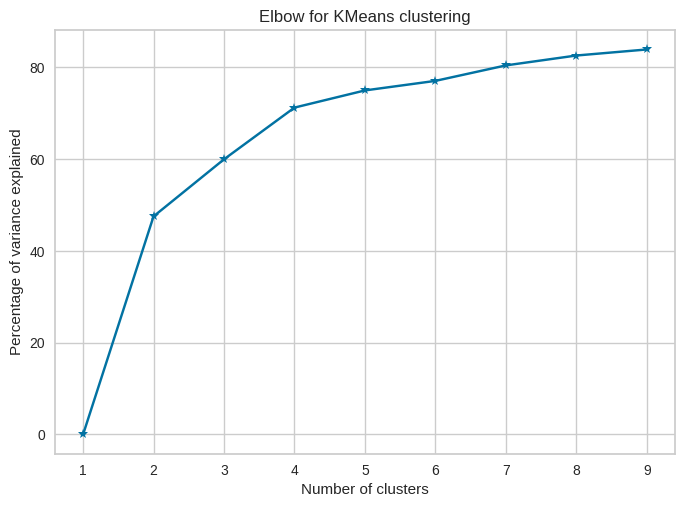

In [78]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(std_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(std_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(std_df)**2)/std_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

conlsuion : k=3

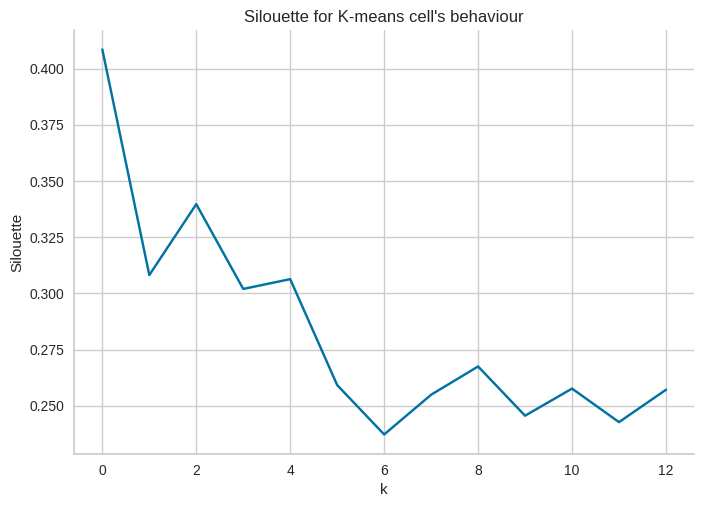

In [79]:
# 3 - sil score

s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(std_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(std_df, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

conlsuion : k=3

CONLUSION

- applied all method to find optimal k
- BIC mehtod not use beacuse - data is multi-dimension
- ELBOW METHOND - k= 3
- VARIANCE EXPLAINED - k=3
- Silouette score is max for k=3


HENCE K=OPTIMAL NO OF CLUSTER = 3

OPTIMAL MEANS
- MAX DISTANCE IN-BETWEEN CLUSTERS
- MINIMUM DISTANCE WITH-IN CLUSTER

Build KMeans Cluster algorithm using K=3 and Standard Scaler Applied Dataset

In [80]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(50,)

In [81]:
#model analysis
y_predict_kmeans

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [82]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.05377053,  1.07340253,  0.19371445,  0.86104144],
       [-0.41081687, -0.32571014,  0.4740874 , -0.20357044]])

In [83]:
model_kmeans.inertia_

80.0888613219962

In [84]:
#Assign clusters to the data set
df['Kmeans_label'] = model_kmeans.labels_


In [85]:
# Group data by Clusters
df.groupby('Kmeans_label').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Kmeans_label,,,,
0,3.600000,78.538462,52.076923,12.176923
1,12.331579,259.315789,68.315789,29.215789
2,6.016667,143.888889,72.333333,19.344444


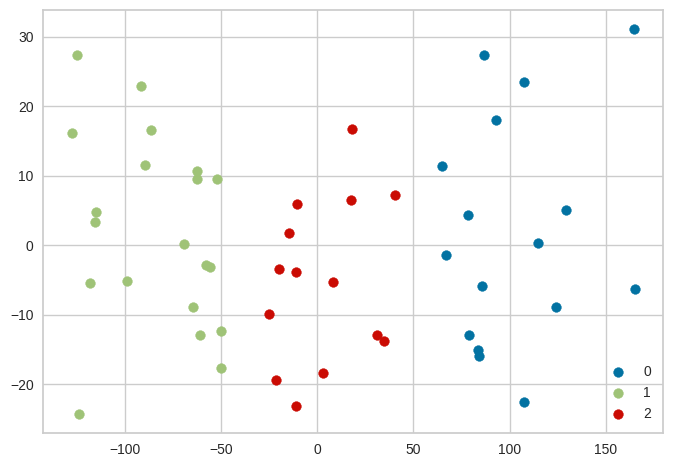

In [90]:
#visualize the scatter plot

df1=data.iloc[:,1:]

from sklearn.decomposition import PCA
pca = PCA(2)

#Transform the data
df2 = pca.fit_transform(df1)

#Initialize the class object
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(df2)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1]  , label = i)
plt.legend()
plt.show()

Observations:
- Cluster-0 seems to be relativley less Murders,Assaults and Rapes (Safe-Zone)
- Cluster-1 seems to have higher crime rates (Danger-Zone)
- Cluster-2 seems to have Moderate crime rates (Moderate-Zone)

In [91]:
#minmax SCALED DATA
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,13.184123
1,2,6.596894
2,3,5.016389
3,4,3.683456
4,5,3.184262
5,6,2.902376
6,7,2.605298
7,8,2.404720
8,9,2.024958
9,10,1.945648


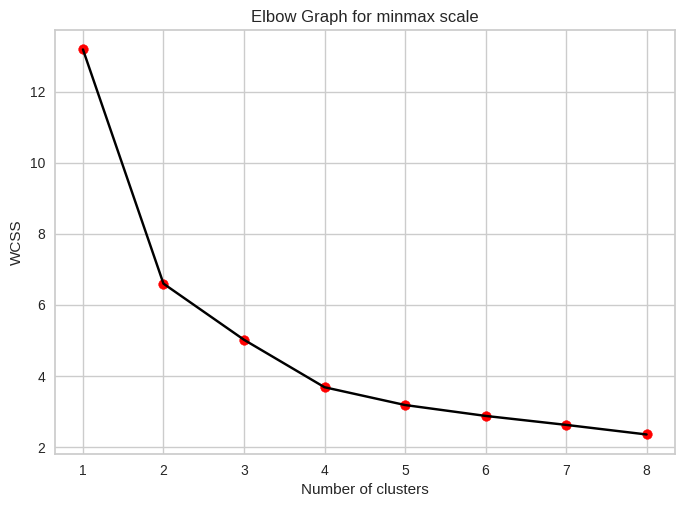

In [92]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for minmax scale')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

cocnlusion : k=2

Text(0.5, 1.0, 'Elbow for KMeans clustering for minmax')

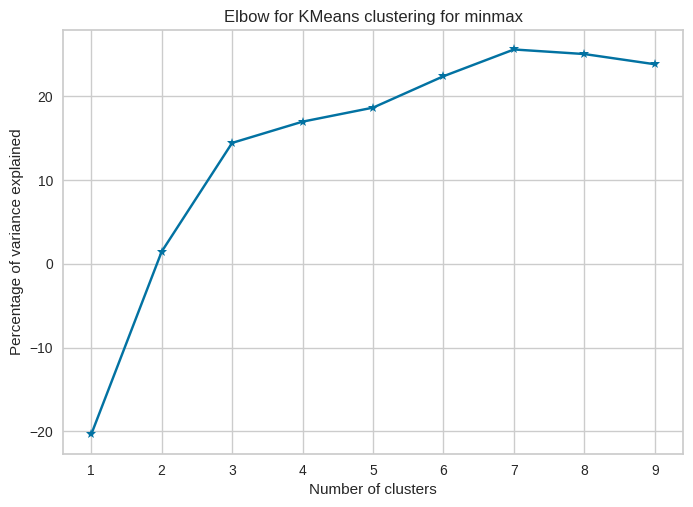

In [95]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(minmax_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(std_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(std_df)**2)/std_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering for minmax')

conlcusion ; k=2

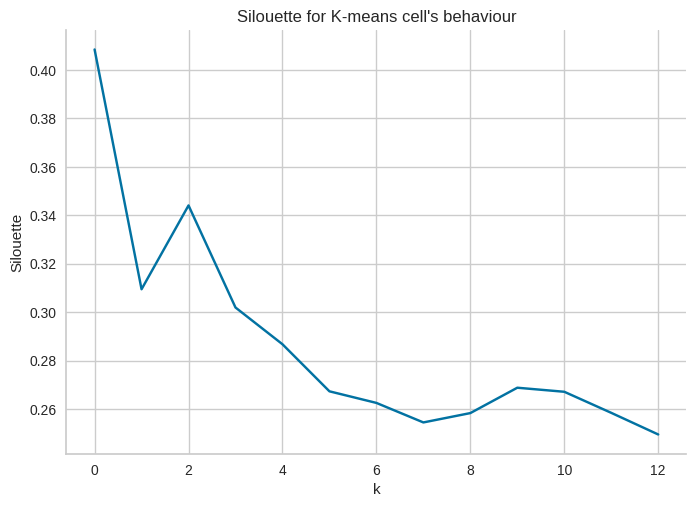

In [94]:
# 3 - sil score
s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(minmax_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(std_df, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

conclusion , sil score max for k -2

CONLUSION

- applied all method to find optimal k
- BIC mehtod not use beacuse - data is multi-dimension
- ELBOW METHOND - k= 2
- VARIANCE EXPLAINED - k=2
- Silouette score is max for k=2


HENCE K=OPTIMAL NO OF CLUSTER = 2

OPTIMAL MEANS
- MAX DISTANCE IN-BETWEEN CLUSTERS
- MINIMUM DISTANCE WITH-IN CLUSTER

Build KMeans Cluster algorithm using K=3 and MINMAX Scaler Applied Dataset

In [98]:
model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(50,)

In [99]:
#model analysis
y_predict_kmeans

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

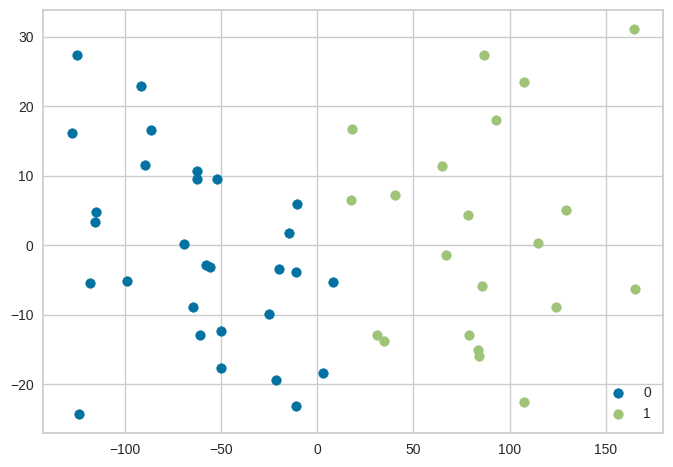

In [100]:
#visualize the scatter plot

df1=data.iloc[:,1:]

from sklearn.decomposition import PCA
pca = PCA(2)

#Transform the data
df2 = pca.fit_transform(df1)

#Initialize the class object
kmeans = KMeans(n_clusters= 2)

#predict the labels of clusters.
label = kmeans.fit_predict(df2)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1]  , label = i)
plt.legend()
plt.show()

observation-

- Cluster 0 -  Safe Zone Defines the group of Urban States with Lowest of Crimes
- Cluster 1 - Danger Zone Defines the group of Urban States with Highest Rate of Crimes

MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than Standard sclaed data

Hierarchical Clustering Algorithm
------

- Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
- In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram

approaches:
- Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
- Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.


Measure for the distance between two clusters - **Linkage methods**

- single
- complete
- centriod
- average

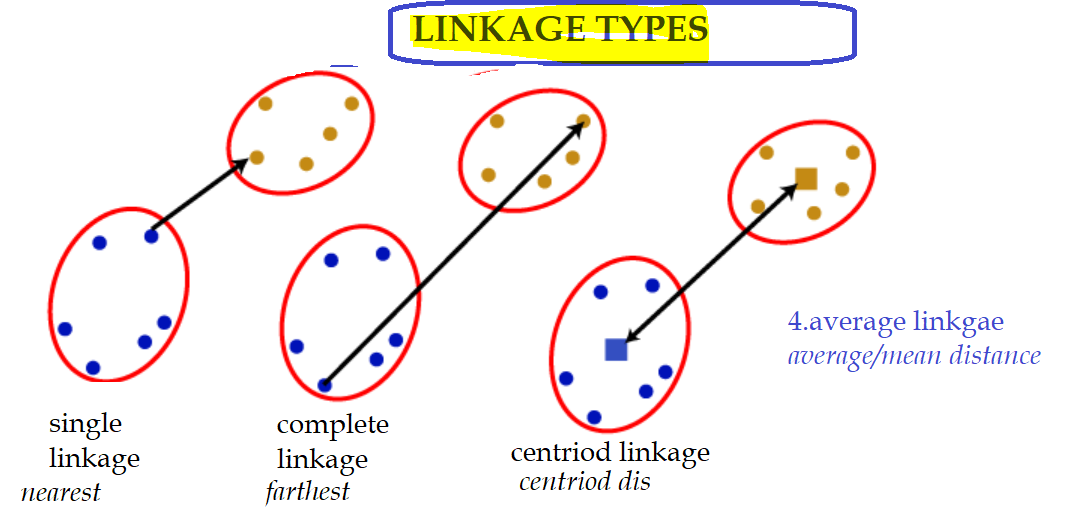

In [101]:
#findind optimal no of cluster and linkage type by comparing sil score
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42150616000142505
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42150616000142505
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42364457559625074
For n_clusters = 2 The average silhouette_score with linkage- single : 0.21033337025958487

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3209429394559654
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3769956951878955
For n_clusters = 3 The average silhouette_score with linkage- average : 0.35149572430421583
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14223288708185444

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.33686925735456114
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.31032111119926603
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36992391140277

conclsuion - no of cluster =2 , linkage = ward

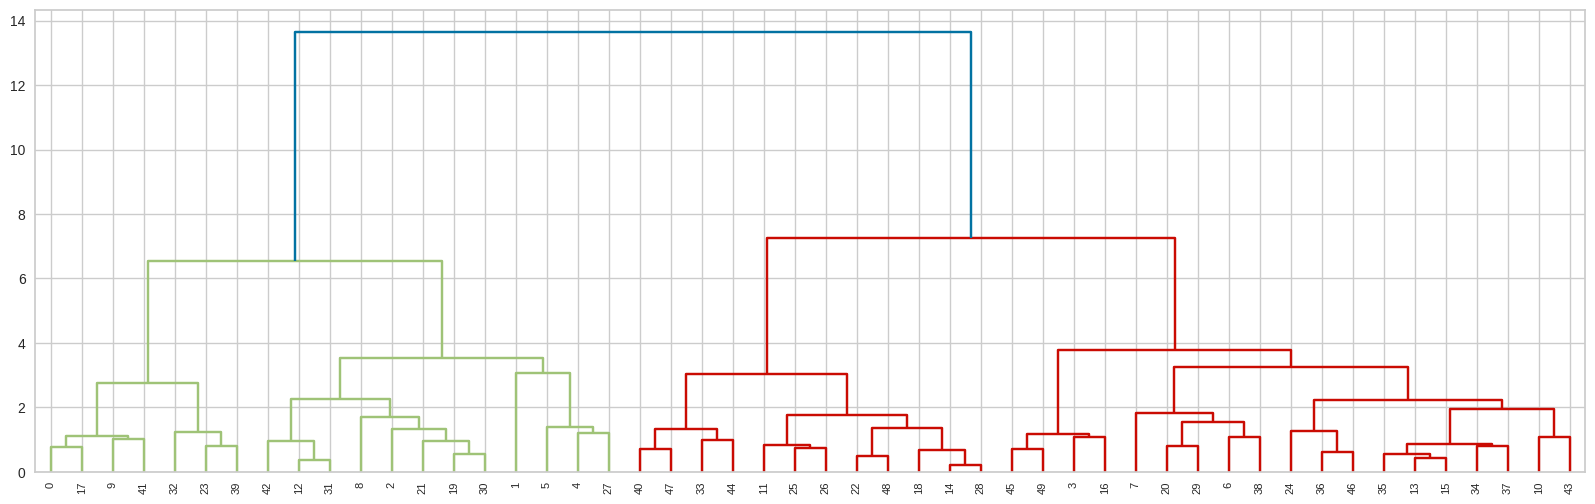

In [102]:
#visulaizing dendogram
plt.figure(figsize =(20, 6))
sch.dendrogram(sch.linkage(std_df, method ='ward',optimal_ordering=False))
plt.show()

In [105]:
#building model
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(std_df)
print(y_pred_hie.shape)


(50,)


In [106]:
#model analysis
y_pred_hie

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [107]:
# Concating Labels with main dataset copy
df['Hierarchical_labels'] = agg_clustering.labels_

In [108]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label
,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,
0,5.003226,116.483871,63.838710,16.338710,1.16129
1,12.331579,259.315789,68.315789,29.215789,1.00000


<Axes: xlabel='Hierarchical_labels'>

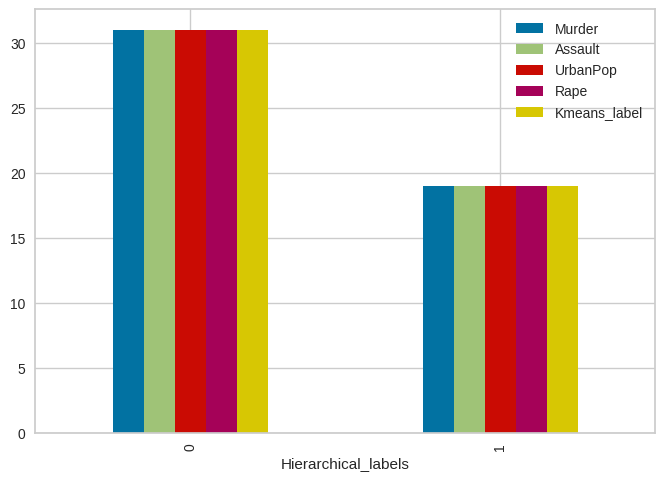

In [109]:
# Plotting barplot
df.groupby(['Hierarchical_labels']).count().plot(kind='bar')

In [110]:
# Clustering Score
(sil(std_df, agg_clustering.labels_)*100).round(3)

40.479

In [111]:
# Clustering Score
(sil(minmax_df, agg_clustering.labels_)*100).round(3)

42.151

conclusion -

- clustering score is better for minmax scaled data with no of cluter =2

Observations:

- The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

Density-Based Spatial Clustering Of Applications With Noise (DBSCAN)

- Clusters are dense regions in the data space, separated by regions of the lower density of points.
- The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”.
- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.


Parameters Required For DBSCAN Algorithm

eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors.
- If the eps value is chosen too small then a large part of the data will be considered as an outlier.
- If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters.
-One way to find the eps value is based on the k-distance graph.

MinPts: Minimum number of neighbors (data points) within eps radius.
- The larger the dataset, the larger value of MinPts must be chosen.
- As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

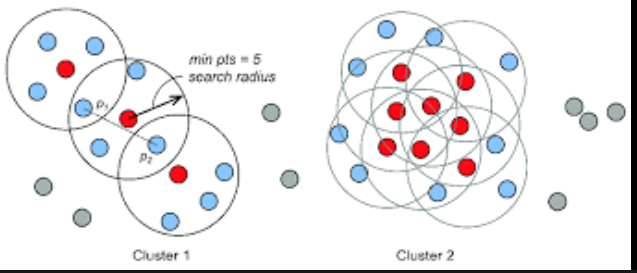

Evaluation Metrics For DBSCAN Algorithm In Machine Learning

- Silhouette score and Adjusted rand score for evaluating clustering algorithms.
- Silhouette’s score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
- Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, and above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery.

In [113]:
#STEP 1 - finding optimal value of EPS and MinPOINT

# eps values to be investigated
eps_values = np.arange(0.15,4,0.25)

# min_samples values to be investigated
#minpoint >=3
min_samples = np.arange(3,30)

DBSCAN_params = zip(eps_values, min_samples)

In [117]:
epsilon = [0.25,0.5]
min_samples = [1,2]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        #score evaluation
        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.5 
min_sample= 1 
number of clusters= 2 
average silhouette score= 0.2103


conclusion building - DBSCAN with eps=0.5 and min pt =1

In [118]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
dbscan.fit(minmax_df)

DBSCAN(min_samples=1)

In [119]:
dbscan.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [120]:
# Concating Labels with main dataset copy

df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels,DBSCAN_labels
States,,,,,,,
Alabama,13.2,236,58,21.2,1,1,0
Alaska,10.0,263,48,44.5,1,1,1
Arizona,8.1,294,80,31.0,1,1,0
Arkansas,8.8,190,50,19.5,2,0,0
California,9.0,276,91,40.6,1,1,0


In [121]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,Kmeans_label,Hierarchical_labels
,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,
0,7.742857,168.877551,65.897959,20.757143,1.102041,0.367347
1,10.000000,263.000000,48.000000,44.500000,1.000000,1.000000


In [122]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df.loc[df.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [123]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,1.102041,1.0
Hierarchical_labels,0.367347,1.0
DBSCAN_labels,0.000000,1.0


Observations:

- The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone

conclusion - standard scaled perform poor as compared to minmax scaled data

HENCE USING

- minmax scaled data
- Dbscan

In [128]:
avg_df

,Cluster1_avg,Cluster2_avg
Murder,7.742857,10.0
Assault,168.877551,263.0
UrbanPop,65.897959,48.0
Rape,20.757143,44.5
Kmeans_label,1.102041,1.0
Hierarchical_labels,0.367347,1.0
DBSCAN_labels,0.000000,1.0


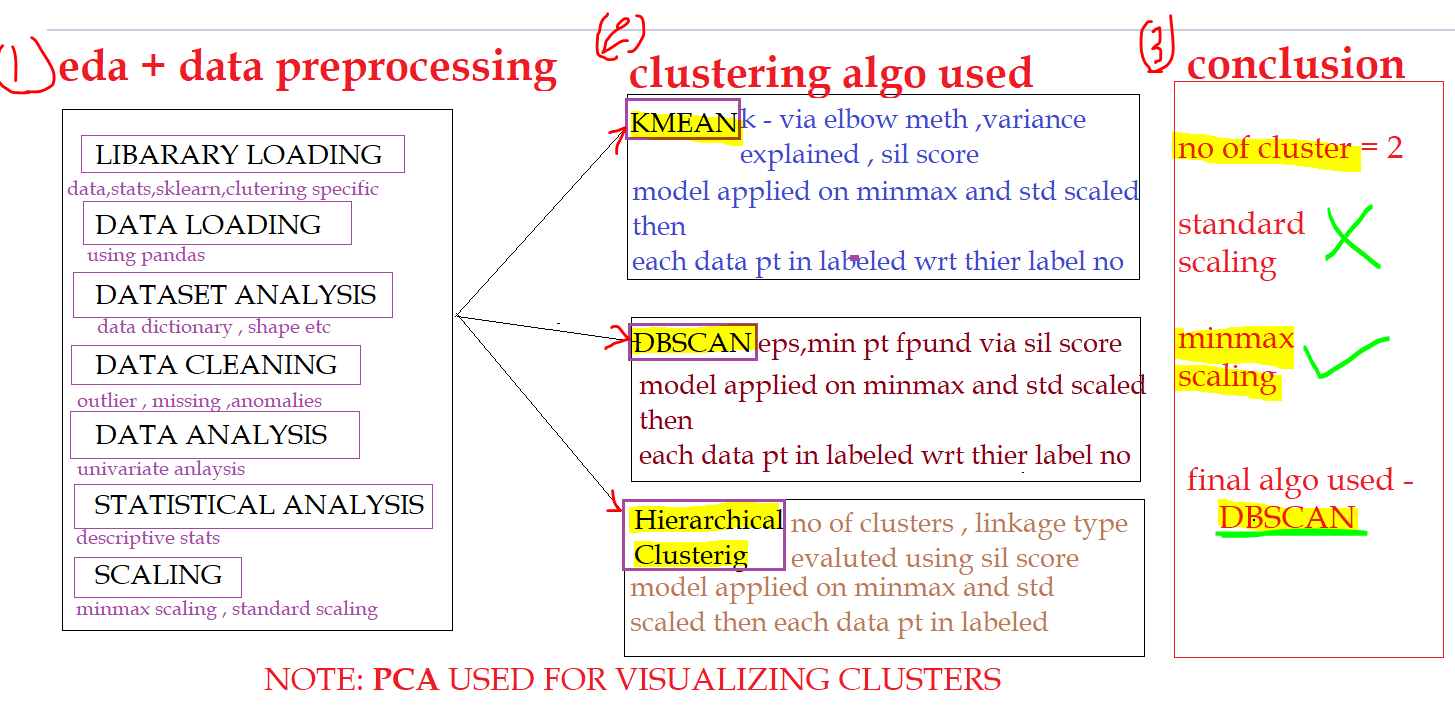